# Exercises in Classification I

In [629]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
#from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier

## Exercise 1

In this exercise, we continue from Exercise 1 and 2 from Multiple Linear Regression and look at the [Energy efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency) dataset (The file "EnergyEfficiency.csv" is also on Moodle). 

Answer the following questions:
1. Do a train-test split of the data and retrain the simple linear regression model between `SurfaceArea` and `HeatingLoad`.
2. Calculate R-square, MAE, and RMSE on the training set
3. Calculate R-square, MAE, and RMSE on the test set
4. Does the model overfit?
5. Visualize the model (the straight line) trained on the training set in a scatter plot of the test dataset. Try also to add the line to a Seaborn regplot of the test dataset.

1. Do a train-test split of the data and retrain the simple linear regression model between `SurfaceArea` and `HeatingLoad`.

In [507]:
df = pd.read_csv("EnergyEfficiency.csv")
df.head()

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [508]:
X_df = df[["SurfaceArea"]]
X_df.head()

,SurfaceArea
0,514.5
1,514.5
2,514.5
3,514.5
4,563.5


In [509]:
X_df.mean()

SurfaceArea    671.708333
dtype: float64

In [510]:
y = df["HeatingLoad"]
y.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: HeatingLoad, dtype: float64

In [511]:
y.mean()

np.float64(22.307200520833334)

In [512]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=4690)

In [513]:
X_train.head()

,SurfaceArea
207,612.5
408,686.0
520,784.0
629,563.5
440,588.0


In [514]:
y_train.head()

207    24.24
408    11.80
520    16.73
629    34.95
440    29.47
Name: HeatingLoad, dtype: float64

In [515]:
X_test.head()

,SurfaceArea
679,563.5
404,661.5
351,612.5
145,514.5
409,686.0


In [516]:
y_test.head()

679    36.57
404    35.99
351    24.94
145    24.40
409    12.03
Name: HeatingLoad, dtype: float64

In [517]:
mlr_model = linear_model.LinearRegression()

In [518]:
mlr_model.fit(X_train, y_train)

LinearRegression()

2. Calculate R-square, MAE, and RMSE on the training set

In [519]:
y_pred_train = mlr_model.predict(X_train)

In [520]:
r2_score(y_train, y_pred_train)

0.4308819066081996

In [521]:
mean_absolute_error(y_train, y_pred_train)

5.955610376186317

In [522]:
root_mean_squared_error(y_train, y_pred_train)

7.589032417608087

3. Calculate R-square, MAE, and RMSE on the test set

In [523]:
y_pred_test = mlr_model.predict(X_test)

In [524]:
r2_score(y_test, y_pred_test)

0.4376000405282835

In [525]:
mean_absolute_error(y_test, y_pred_test)

6.105734271308426

In [526]:
root_mean_squared_error(y_test, y_pred_test)

7.602613329042482

4. Does the model overfit?

The model is not overfitted, as the R2 score doesn't change significicantly between the test and train data. Likewise the MAE and RMSE is similarely close

5. Visualize the model (the straight line) trained on the training set in a scatter plot of the test dataset. Try also to add the line to a Seaborn regplot of the test dataset.

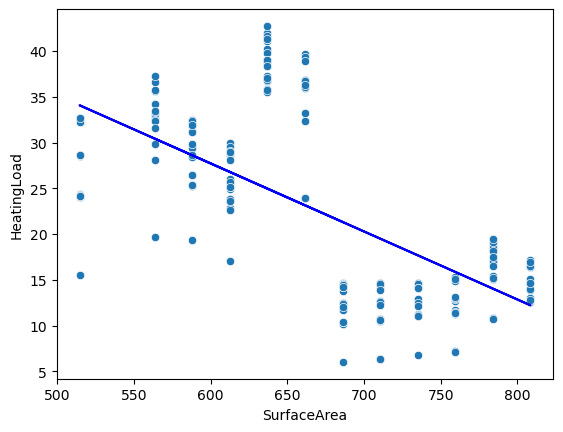

In [527]:


sns.scatterplot(x = X_test['SurfaceArea'], y = y_test)
plt.plot(X_train["SurfaceArea"], y_pred_train, color = "orange")
plt.plot(X_test["SurfaceArea"], y_pred_test, color = "blue")

plt.show()

## Exercise 2

In this exercise, we will predict the two income classes in the adult dataset (The file "adult.csv" is also on Moodle). 

Answer the following questions:
1. Clean the `income` variable such that it has only two values
2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.
3. Create X and y dataset and split the datasets into training and testing sets
4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 
5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.
6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
7. Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

1. Clean the `income` variable such that it has only two values

In [528]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [529]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [530]:
df.income.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

Cleaning the income variable:

In [531]:
df["income"] = df["income"].replace({"<=50K." : "<=50K", ">50K.": ">50K"})

In [532]:
df["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.

We try to find feature variables, that have a significant relationship. Our null-hypothesis is that there is no significant assosication between response variable (income) and predictor variable (X)
P-value threshold = 0.05

Starting with sex and income:

In [533]:
pd.crosstab(df["sex"], df["income"])

income,<=50K,>50K
sex,,
Female,14423,1769
Male,22732,9918


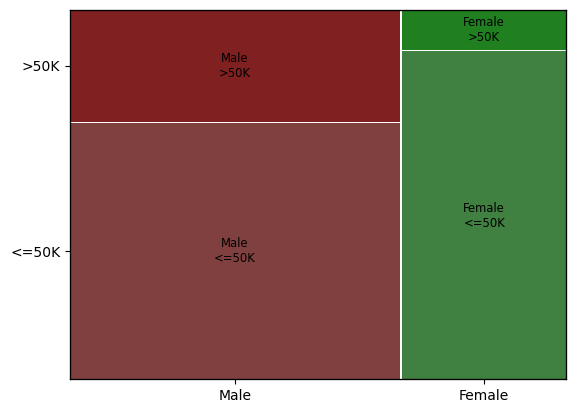

In [534]:
mosaic(df, ["sex", "income"])
plt.show()

Our mosaic plot shows us that the proportion of females earning <=50K is bigger compared to males. It also shows that more males are present in the dataset.
Let's test the relationship with Chi-squared test:

In [535]:
stats.chi2_contingency(pd.crosstab(df["sex"], df["income"]))

Chi2ContingencyResult(statistic=np.float64(2248.847679013691), pvalue=np.float64(0.0), dof=1, expected_freq=array([[12317.54964989,  3874.45035011],
       [24837.45035011,  7812.54964989]]))

As exptected, we reject the null hypothesis due to the p-value of 0.0

Doing the same for hours-pr-week:

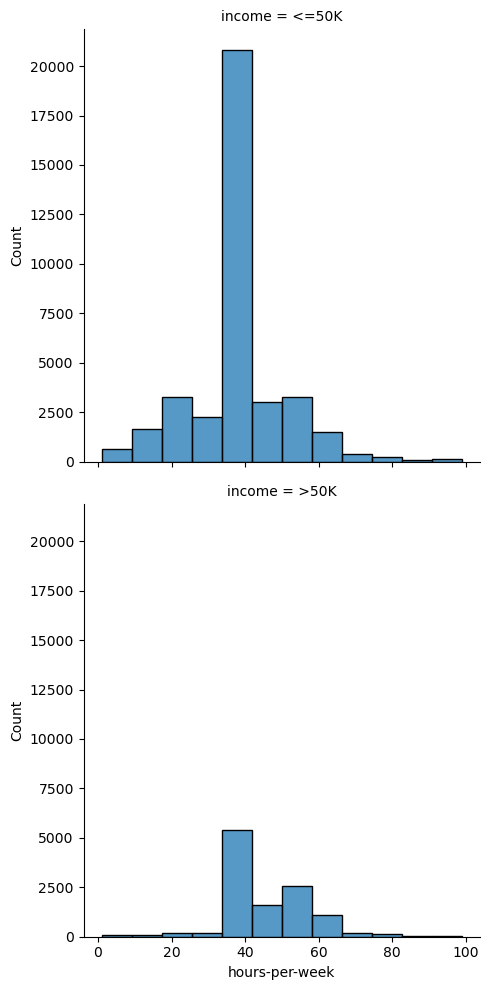

In [536]:
g=sns.FacetGrid(data = df, row="income", height = 5)
g.map(sns.histplot, "hours-per-week", bins = 12)
plt.show()

We can see that the data is not normally distributed

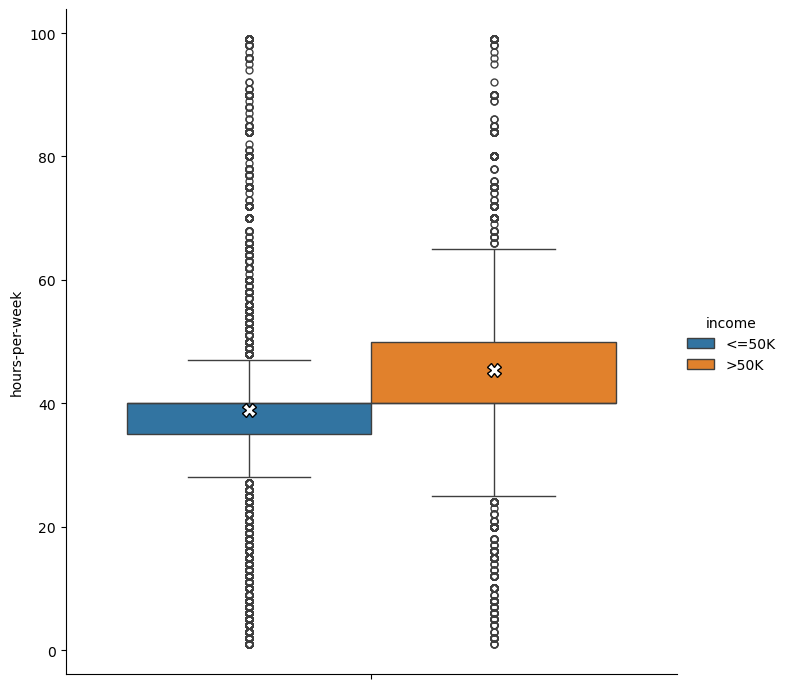

In [537]:
sns.catplot(y="hours-per-week", hue = "income", data = df, kind="box", height = 7,
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.show()

The boxplot indicates that those earning >50K, work more hours. Lets test it. As the data is not normally distributed, we move forward with a mann-whitney U test

In [538]:
stats.mannwhitneyu(df[df["income"]=="<=50K"]["hours-per-week"], df[df["income"]==">50K"]["hours-per-week"])

MannwhitneyuResult(statistic=np.float64(142488722.0), pvalue=np.float64(0.0))

We reject the null hypothesis!

For age:

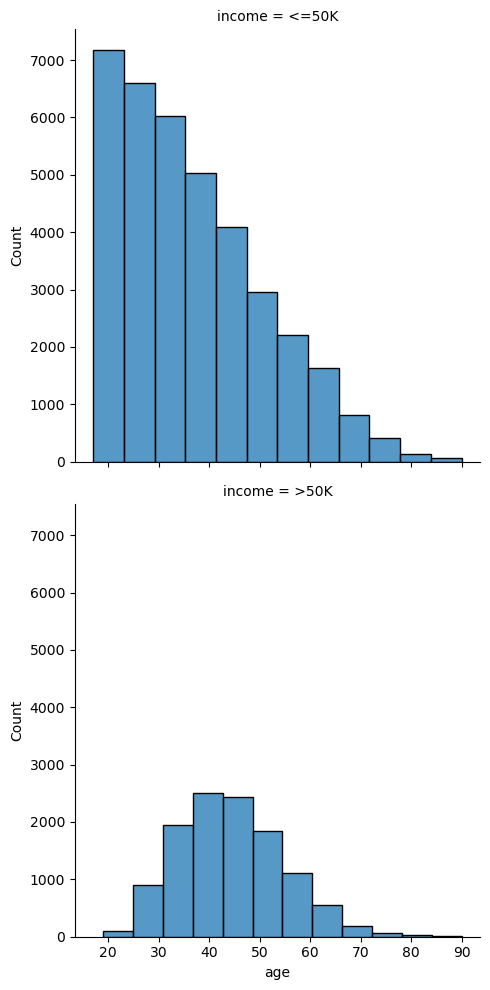

In [539]:
g=sns.FacetGrid(data = df, row="income", height = 5)
g.map(sns.histplot, "age", bins = 12)
plt.show()

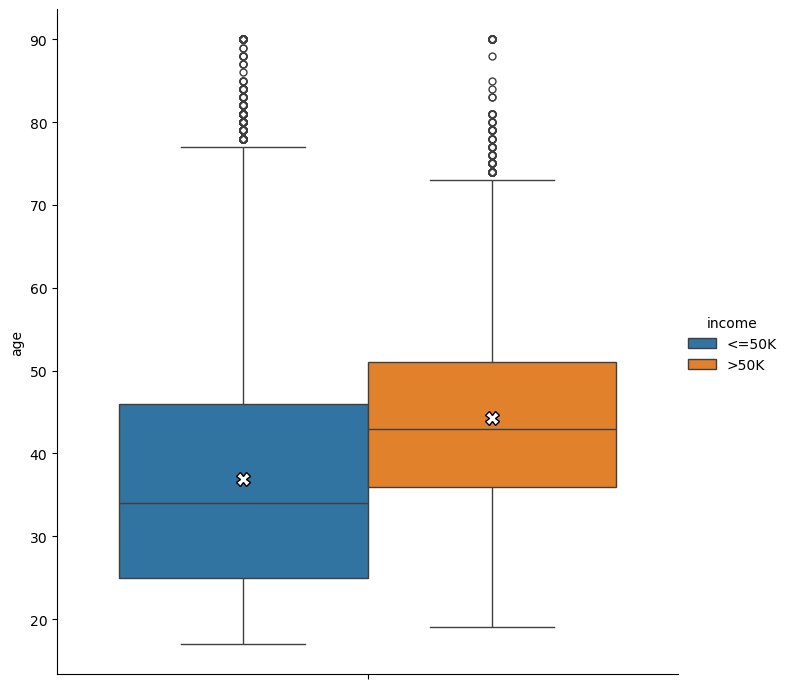

In [540]:
sns.catplot(y="age", hue = "income", data = df, kind="box", height = 7,
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.show()

Once again the data is not normally distributed

In [541]:
stats.mannwhitneyu(df[df["income"]=="<=50K"]["age"], df[df["income"]==">50K"]["age"])

MannwhitneyuResult(statistic=np.float64(137973415.5), pvalue=np.float64(0.0))

Finally for relationship:

In [542]:
pd.crosstab(df["relationship"], df["income"])

income,<=50K,>50K
relationship,,
Husband,10870,8846
Not-in-family,11307,1276
Other-relative,1454,52
Own-child,7470,111
Unmarried,4816,309
Wife,1238,1093


In [543]:
stats.chi2_contingency(pd.crosstab(df["relationship"], df["income"]))

Chi2ContingencyResult(statistic=np.float64(10088.722490152224), pvalue=np.float64(0.0), dof=5, expected_freq=array([[14998.32070759,  4717.67929241],
       [ 9572.11754228,  3010.88245772],
       [ 1145.64166087,   360.35833913],
       [ 5767.00493428,  1813.99506572],
       [ 3898.68095082,  1226.31904918],
       [ 1773.23420417,   557.76579583]]))

We reject the null hypothesis!

3. Create X and y dataset and split the datasets into training and testing sets

As we have selected categorical variables, we transform to dummy

In [544]:
X_df = df[["hours-per-week","age"]]
X_df = X_df.join(pd.get_dummies(df[["sex", "relationship"]], drop_first=True, dtype=int))
X_df.head()

,hours-per-week,age,sex_Male,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,40,39,1,1,0,0,0,0
1,13,50,1,0,0,0,0,0
2,40,38,1,1,0,0,0,0
3,40,53,1,0,0,0,0,0
4,40,28,0,0,0,0,0,1


In [545]:
y = df["income"].map({">50K": 1, "<=50K": 0})
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

Vizualizing class distribution:

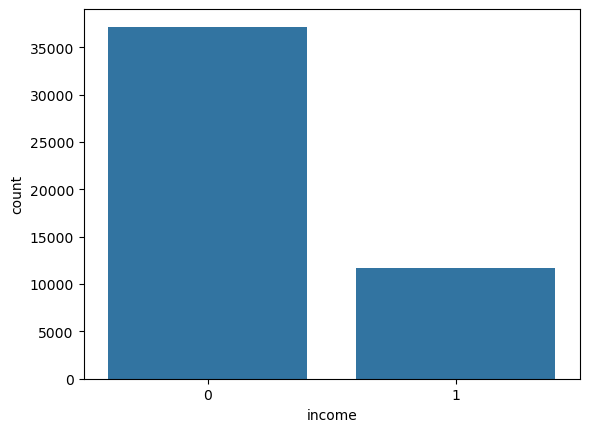

income
0    0.760718
1    0.239282
Name: proportion, dtype: float64

In [546]:
sns.countplot(x=y)  
plt.show()

y.value_counts(normalize=True)

Note that there is class imbalance! As such we specify that our train_test_split should do a stratisfied split, ensuring that the class distribution is preserved

In [547]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, stratify=y, random_state=123)

Checking that index matches:

In [548]:
X_train.head()

,hours-per-week,age,sex_Male,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
6616,60,33,1,1,0,0,0,0
37216,50,37,1,1,0,0,0,0
18768,40,34,1,0,0,1,0,0
31054,50,50,1,0,0,0,0,0
2256,45,42,1,0,0,0,0,0


In [549]:
y_train.head()

6616     0
37216    0
18768    0
31054    1
2256     0
Name: income, dtype: int64

In [550]:
X_test.head()

,hours-per-week,age,sex_Male,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
39881,60,57,1,0,0,0,0,0
29087,40,48,0,0,0,0,0,1
45469,50,23,1,0,0,0,0,0
36283,18,20,0,0,0,1,0,0
45342,40,56,0,0,1,0,0,0


In [551]:
y_test.head()

39881    1
29087    1
45469    0
36283    0
45342    0
Name: income, dtype: int64

4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 

In [552]:
# def evaluate_knn(X_train, X_test, y_train, y_test, maxK):
#     # Accuracy list for train/testm storing values for each tested k
#     train_test_acc = []
  
#     for k in range(1, maxK):
#         # Model intializing
#         knn = KNeighborsClassifier(n_neighbors=k)

#         # Training (very light compared to an eager learner)
  
#         knn.fit(X_train, y_train)

#         # Predicting on train and test set
#         y_pred_train = knn.predict(X_train)
#         y_pred_test = knn.predict(X_test)

#         # Get the accuracy from metrics
#         accuracy_train = accuracy_score(y_train, y_pred_train)

#         accuracy_test = accuracy_score(y_test, y_pred_test)

#         train_test_acc.append({"k": k, "Training accuracy": accuracy_train, "Test accuracy": accuracy_test})

#     return pd.DataFrame(train_test_acc)

In [553]:
# result = evaluate_knn(X_train, X_test, y_train, y_test, 25)
# result

In [554]:
# plt.plot(result["k"], result["Training accuracy"], label = 'Training accuracy', color='blue', marker='o', linestyle='solid')
# plt.plot(result["k"], result["Test accuracy"], label = 'Test accuracy', color='orange', marker='o', linestyle='solid')
    
# plt.xlabel('K')
# plt.ylabel('Accuracy')
# plt.title("Accuracy of different Ks")
# plt.legend()

# plt.show()

We first check the data, to see if scaling is necessary:

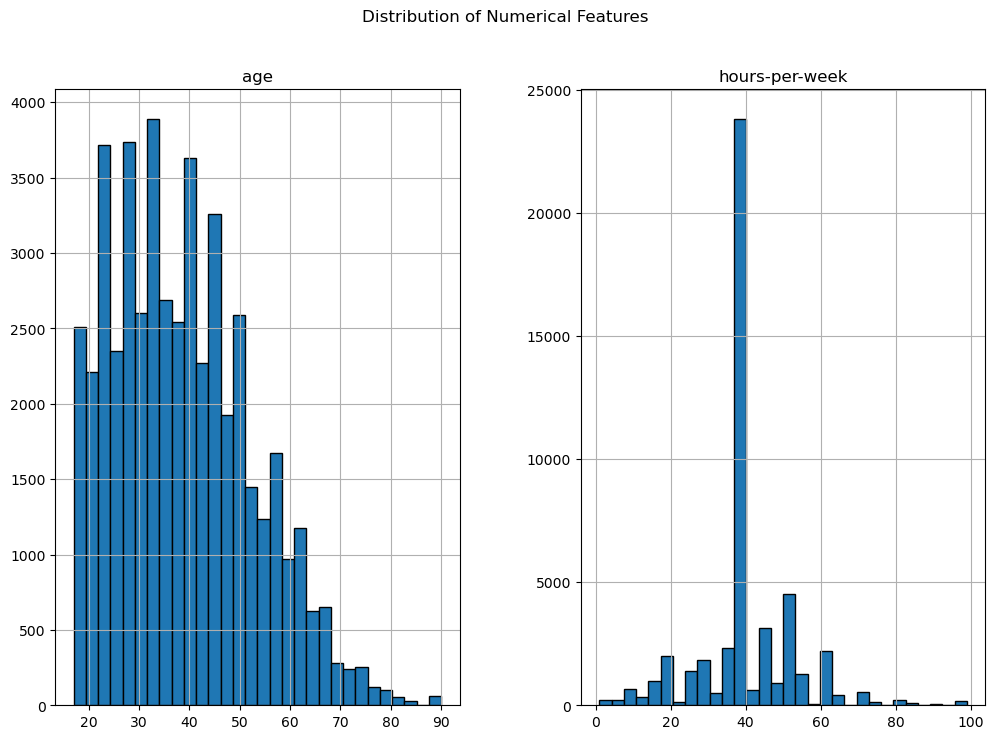

In [555]:
df[["age", "hours-per-week"]].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()


In [556]:
df[["age", "hours-per-week"]].describe()

,age,hours-per-week
count,48842.000000,48842.000000
mean,38.643585,40.422382
std,13.710510,12.391444
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


We see that the standard deviation is fairly similar, but the range is not. The data is also not normaly distributed, and we decide to scale with MinMaxScaler

In [557]:
X_train

,hours-per-week,age,sex_Male,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
6616,60,33,1,1,0,0,0,0
37216,50,37,1,1,0,0,0,0
18768,40,34,1,0,0,1,0,0
31054,50,50,1,0,0,0,0,0
2256,45,42,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
27449,40,54,1,0,0,0,0,0
30476,60,37,1,0,0,0,0,0
12989,20,22,1,0,0,1,0,0
15897,35,30,1,1,0,0,0,0


Doing the scaling:

In [558]:
# Seperating numerical columms, so we only do minMaxScaling on them (and not on the hot-encoded ones)
X_train_num = X_train[["hours-per-week", "age"]] 
X_test_num = X_test[["hours-per-week", "age"]] 


minMaxScaler = MinMaxScaler()
X_train_scaled_num = minMaxScaler.fit_transform(X_train_num) 
X_test_scaled_num = minMaxScaler.transform(X_test_num)

X_scaled_train = X_train.copy()
X_scaled_test = X_test.copy()

X_scaled_train[["hours-per-week", "age"]] = X_train_scaled_num
X_scaled_test[["hours-per-week", "age"]] = X_test_scaled_num


In [559]:
X_scaled_train.head()

,hours-per-week,age,sex_Male,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
6616,0.602041,0.219178,1,1,0,0,0,0
37216,0.500000,0.273973,1,1,0,0,0,0
18768,0.397959,0.232877,1,0,0,1,0,0
31054,0.500000,0.452055,1,0,0,0,0,0
2256,0.448980,0.342466,1,0,0,0,0,0


In [560]:
X_scaled_test.head()

,hours-per-week,age,sex_Male,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
39881,0.602041,0.547945,1,0,0,0,0,0
29087,0.397959,0.424658,0,0,0,0,0,1
45469,0.500000,0.082192,1,0,0,0,0,0
36283,0.173469,0.041096,0,0,0,1,0,0
45342,0.397959,0.534247,0,0,1,0,0,0


We now do GridSearchCV, which both do cross-validation and also hyperparameter tuning. It defaults to using stratisfied CV. Because of the beforementioned class-imbalance, we decide to use F1 scoring instead of accuracy. This is due to the fact that  accuracy can be misleading! The model might predict the majority class more frequently, while failing to properly classify the minority class

In [561]:
def knnSweepCrossValidation(X, y, maxK, folds):
    param_grid = {'n_neighbors': range(2, maxK)}

    knn = KNeighborsClassifier()

    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=folds, scoring='f1', n_jobs=-1)


    grid_search.fit(X, y)

    results = pd.DataFrame(grid_search.cv_results_)

    # Extracting the K and mean of CV AUC scores
    results = results[['param_n_neighbors', 'mean_test_score']]
    results.columns = ['K', 'CV F1']
    return results

In [562]:
results = knnSweepCrossValidation(X_scaled_train, y_train, maxK=25, folds=10)
results


,K,CV F1
0,2,0.319996
1,3,0.462262
2,4,0.379497
3,5,0.480616
4,6,0.414381
5,7,0.482975
6,8,0.419224
7,9,0.484883
8,10,0.422976
9,11,0.495705


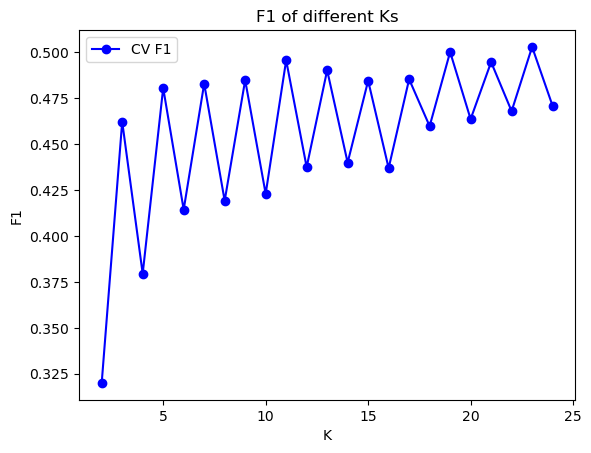

In [563]:
plt.plot(results["K"], results["CV F1"], label="CV F1", color="blue", marker="o", linestyle="solid")
    
plt.xlabel("K")
plt.ylabel("F1")
plt.title("F1 of different Ks")
plt.legend()

plt.show()

The F1 score is fluctuating quite a bit, but seems to stabilize somehow a little more after K=15. It also seems like an even K consistently performs worse. We move further with a K of 19, as it seems to be almost the highest and most stable

In [564]:
knn19 = KNeighborsClassifier(n_neighbors=19)

In [565]:
knn19.fit(X_scaled_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [566]:
y_pred_train_knn = knn19.predict(X_scaled_train)
y_pred_test_knn = knn19.predict(X_scaled_test)

There is no clear sign of overfitting. Only a small drop in F1, and even sligther drop in accuracy. However, it could be suspected that the model is underfitted, leading to high bias but low variance, due to the poor performance. 

In [567]:
EvaluationScoreDF_knn = pd.DataFrame([{
                                  "Accuracy": accuracy_score(y_train, y_pred_train_knn),
                                  "Precision": precision_score(y_train, y_pred_train_knn),
                                  "Recall": recall_score(y_train, y_pred_train_knn),
                                  "F1": f1_score(y_train, y_pred_train_knn)}])
EvaluationScoreDF_knn                            

,Accuracy,Precision,Recall,F1
0,0.795636,0.588001,0.487593,0.533111


In [568]:
EvaluationScoreDF_knn = pd.DataFrame({"K": [13],
                                  "Accuracy": accuracy_score(y_test, y_pred_test_knn),
                                  "Precision": precision_score(y_test, y_pred_test_knn),
                                  "Recall": recall_score(y_test, y_pred_test_knn),
                                  "F1": f1_score(y_test, y_pred_test_knn)})
EvaluationScoreDF_knn            

,K,Accuracy,Precision,Recall,F1
0,13,0.781069,0.550819,0.460639,0.501709


We now make a confusion matrix for the test set:

In [569]:
confusion_matrix(y_test, y_pred_test_knn)

array([[9830, 1317],
       [1891, 1615]])

As mentioned, and as seen in the confusion matrix, there is class imbalance. This resuls in bias toward the 0 class. For class 0 we see TN of 9830, and FP of 1317. For class 1, we see TP of 1615 and FN of 1891

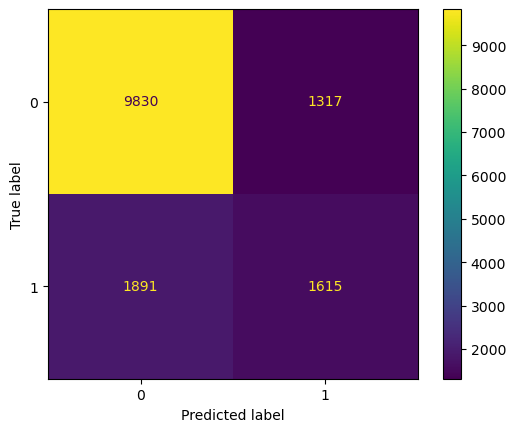

In [570]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test_knn)).plot()
plt.show()

The models precision tells us the fraction of positive classifications that are truly positive. With a precision (TP/(TP+FP)) of 0.550819, the models often misclassify the negatives as positives.  

Recall (TP/(TP+FN)) tells us the fraction of actual positives, that the model classified as positive. The recall for our model is 0.460639. In other words, a lot of times the model is not able to detect the positive cases

Finally looking at the F1-score (2*Precision*Recall/(Precision+Recall)) = 0.501709, giving us a harmonic mean of precision and recall, it becomes apparent that the models overall performance in regards of identifying positive cases is quite bad. It also higlights the importance of not solely relying on accuracy, especially when working with imbalanced datasets. If we had done so, we could potentially had regarded our model as good, due to the high accuracy.

Creating a ROC-AUC curve: The AUC score tells us how well the model seperates the 2 classed based on probability scores, NOT how many predictions are correct. It tells us that the model is good at ranking the positive higher than the negatives. It should  be noted that AUC is a measure across different thresholds

In [571]:
y_probs_knn = knn19.predict_proba(X_scaled_test)[:,1]

y_probs_knn

array([0.57894737, 0.63157895, 0.15789474, ..., 0.42105263, 0.        ,
       0.05263158], shape=(14653,))

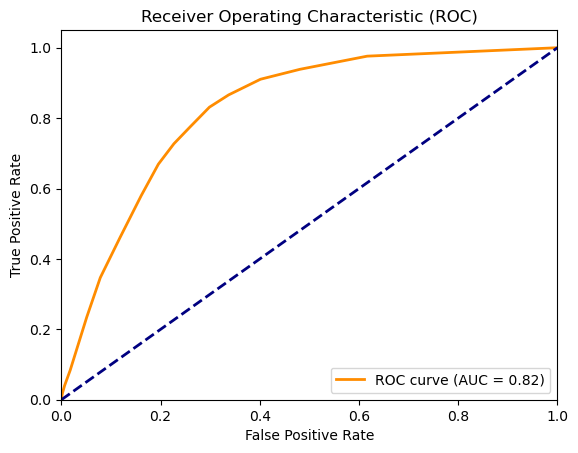

In [572]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_knn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [573]:
roc_auc_score(y_test, y_probs_knn)

np.float64(0.823822453361552)

The model gets an high AUC score of 0.82, indicating that it in 82% of the cases ranks the positive class higher than the negative. However, in regards of the low F1 score, it clearly shows that it struggles with the standard classification threshold of 0.5

5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.

In [574]:

def logRegSweepCrossValidation(X, y, folds):
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength (penalty). Potential risks: Low C = high regularization (More bias, underfitting), High C = low regularization (More variance, overfitting)
    }

    logit_model_sk = linear_model.LogisticRegression()

    grid_search = GridSearchCV(estimator=logit_model_sk, param_grid=param_grid, cv=folds, scoring='f1', n_jobs=-1)
    grid_search.fit(X, y)

    results = pd.DataFrame(grid_search.cv_results_)

    results = results[['param_C', 'mean_test_score']]
    results.columns = ['C', 'CV F1']

    best_params = grid_search.best_params_
    best_f1 = grid_search.best_score_

    return results, best_params, best_f1


It seems like the C-value of 1(which is also the default value) is the best, as higher values doesn't give much of an improvement in F1. A lower C gives a simpler model with potentially less variance, but more bias

In [575]:
logRegSweepCrossValidation(X_scaled_train, y_train, folds=10)

(         C     CV F1
 0    0.001  0.000000
 1    0.010  0.096718
 2    0.100  0.345535
 3    1.000  0.378494
 4   10.000  0.381137
 5  100.000  0.381782,
 {'C': 100},
 np.float64(0.38178231662075335))

In [576]:
logit_model_sk = linear_model.LogisticRegression()

In [577]:
logit_model_sk.fit(X_scaled_train, y_train)

LogisticRegression()

Accuracy is quite close to KNN. However, both recall and F1 is dropping significantly. This indicates a clear sign that the model is underfit (high bias, low variance)

In [578]:
y_pred_train_lg = logit_model_sk.predict(X_scaled_train)
y_pred_test_lg = logit_model_sk.predict(X_scaled_test)

In [579]:
EvaluationScoreDF_lg = pd.DataFrame([{
                                  "Accuracy": accuracy_score(y_train, y_pred_train_lg),
                                  "Precision": precision_score(y_train, y_pred_train_lg),
                                  "Recall": recall_score(y_train, y_pred_train_lg),
                                  "F1": f1_score(y_train, y_pred_train_lg)}])
EvaluationScoreDF_lg                           

,Accuracy,Precision,Recall,F1
0,0.771154,0.540819,0.289084,0.376772


In [580]:
EvaluationScoreDF_lg = pd.DataFrame([{
                                  "Accuracy": accuracy_score(y_test, y_pred_test_lg),
                                  "Precision": precision_score(y_test, y_pred_test_lg),
                                  "Recall": recall_score(y_test, y_pred_test_lg),
                                  "F1": f1_score(y_test, y_pred_test_lg)}])
EvaluationScoreDF_lg                            

,Accuracy,Precision,Recall,F1
0,0.771924,0.543757,0.290645,0.37881


In [581]:
confusion_matrix(y_test, y_pred_test_lg)

array([[10292,   855],
       [ 2487,  1019]])

Compared to KNN, the logistic model is better at predicting the negative class, but worse at predicting the positive. We see quite a large drop in recall and F1-score. This indicates that the model misses even more of the positives (the false negatives are high)

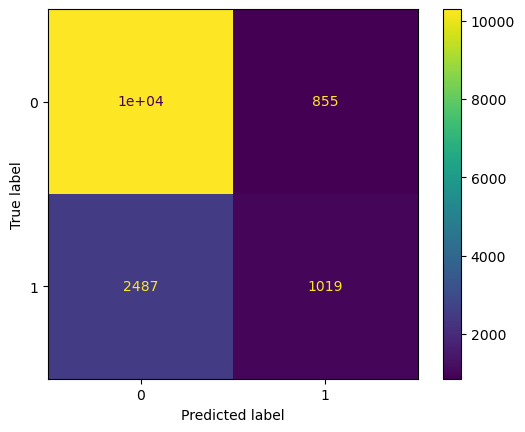

In [582]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test_lg)).plot()
plt.show()

In [583]:
logit_model_sk.predict_proba(X_scaled_test)

array([[0.34432662, 0.65567338],
       [0.45945423, 0.54054577],
       [0.62120644, 0.37879356],
       ...,
       [0.51776914, 0.48223086],
       [0.97945823, 0.02054177],
       [0.94556785, 0.05443215]], shape=(14653, 2))

In [584]:
y_probs_test_lg = logit_model_sk.predict_proba(X_scaled_test)[:,1]

y_probs_test_lg

array([0.65567338, 0.54054577, 0.37879356, ..., 0.48223086, 0.02054177,
       0.05443215], shape=(14653,))

Our logistic model has an AUC of 0.83. This is close to the AUC value for KNN. In other words they are equally good at ranking the positives higher than the negatives, but in terms of predicting the minority class (positives), it struggles even more. Thus the models performs worse than KNN, even though it has a slightly larger AUC value 

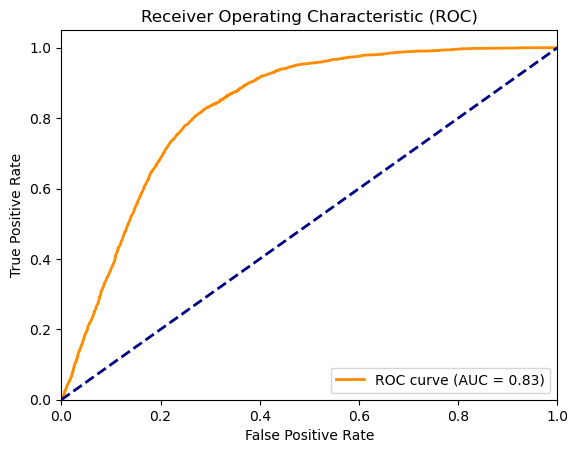

In [585]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_test_lg)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

In [586]:
def decisionTreeSweepCrossValidation(X, y, folds):
    param_grid = {
        'max_depth': [3, 5, 10, None],  # Controls tree depth
        'criterion': ["gini", "entropy"],  # Splitting criterion
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
    }

    tree_model = DecisionTreeClassifier()

    grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=folds, scoring='f1', n_jobs=-1)
    grid_search.fit(X, y)

    results = pd.DataFrame(grid_search.cv_results_)
    results = results[['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score']]
    results.columns = ['Max Depth', 'Min Samples Split', 'Min Samples Leaf', 'CV F1']

    best_params = grid_search.best_params_
    best_f1 = grid_search.best_score_

    return results, best_params, best_f1


In [587]:
results, best_params, best_f1 = decisionTreeSweepCrossValidation(X_scaled_train, y_train, folds=10)

In [588]:
best_params

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [589]:
results, best_f1

(   Max Depth  Min Samples Split  Min Samples Leaf     CV F1
 0          3                  2                 1  0.092042
 1          3                  5                 1  0.092042
 2          3                 10                 1  0.092042
 3          3                  2                 2  0.092042
 4          3                  5                 2  0.092042
 ..       ...                ...               ...       ...
 67      None                  5                 2  0.480231
 68      None                 10                 2  0.486768
 69      None                  2                 4  0.486144
 70      None                  5                 4  0.485902
 71      None                 10                 4  0.487438
 
 [72 rows x 4 columns],
 np.float64(0.48743813479122533))

In [590]:
dtree = DecisionTreeClassifier(**best_params)

In [591]:
dtree = dtree.fit(X_scaled_train, y_train)

In [592]:
y_pred_train_dt = dtree.predict(X_scaled_train)
y_pred_test_dt = dtree.predict(X_scaled_test)

Our Decision Tree model performs better than the Logistic Regression model, and performs slightly worse than the KNN. In other words, the model still struggles with the positives classification

In [593]:
EvaluationScoreDF = pd.DataFrame([{
                                  "Accuracy": accuracy_score(y_train, y_pred_train_dt),
                                  "Precision": precision_score(y_train, y_pred_train_dt),
                                  "Recall": recall_score(y_train, y_pred_train_dt),
                                  "F1": f1_score(y_train, y_pred_train_dt)}])
EvaluationScoreDF                            

,Accuracy,Precision,Recall,F1
0,0.810582,0.630611,0.503117,0.559695


In [594]:
EvaluationScoreDF = pd.DataFrame([{
                                  "Accuracy": accuracy_score(y_test, y_pred_test_dt),
                                  "Precision": precision_score(y_test, y_pred_test_dt),
                                  "Recall": recall_score(y_test, y_pred_test_dt),
                                  "F1": f1_score(y_test, y_pred_test_dt)}])
EvaluationScoreDF                            

,Accuracy,Precision,Recall,F1
0,0.776087,0.539158,0.441814,0.485656


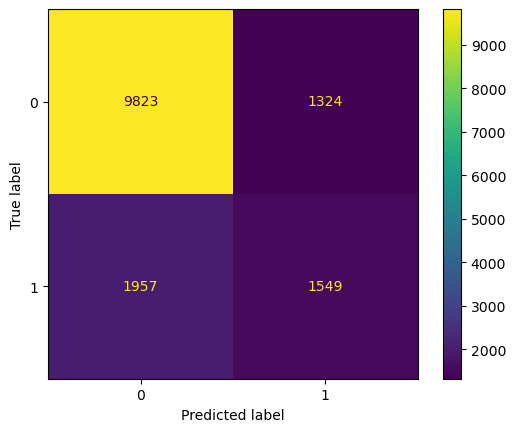

In [597]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test_dt)).plot()
plt.show()

In [598]:
y_probs_test_dt = dtree.predict_proba(X_scaled_test)[:,1]

y_probs_test_dt

array([0.58823529, 0.70588235, 0.11111111, ..., 0.44545455, 0.        ,
       0.02380952], shape=(14653,))

The AUC value is also similar to the previous:

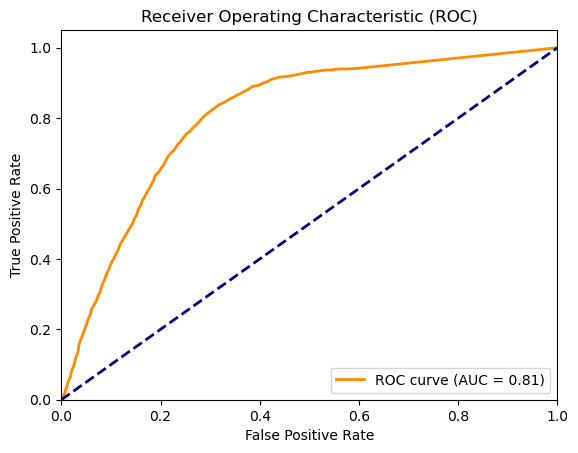

In [599]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_test_dt)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

7. Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

We now chance to using a RandomizedSearchCV instead, as GridSearchCV was too computately heavy for my pc..

In [608]:
def rfSweepCrossValidation(X, y, folds):
    param_grid = {
        'n_estimators': range(200, 801),  # Number of trees
        'max_depth': range(1, 51),  # Tree depth
        'min_samples_split': range(2, 11),  # Min samples required to split
        'min_samples_leaf': range(1, 6),  # Min samples per leaf
        'criterion': ['gini', 'entropy']  # Splitting criterion
    }

    rf_model = RandomForestClassifier()

    randomized_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=20, cv=folds, scoring='f1', n_jobs=-1)

    randomized_search.fit(X, y)

    results = pd.DataFrame(randomized_search.cv_results_)
    results = results[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 
                       'param_min_samples_leaf', 'mean_test_score']]
    results.columns = ['N Estimators', 'Max Depth', 'Min Samples Split', 'Min Samples Leaf', 'CV F1']

    best_params = randomized_search.best_params_
    best_f1 = randomized_search.best_score_

    return results, best_params, best_f1


In [609]:
results, best_params, best_f1 = rfSweepCrossValidation(X_scaled_train, y_train, folds=10)

In [610]:
results, best_params, best_f1

(    N Estimators  Max Depth  Min Samples Split  Min Samples Leaf     CV F1
 0            623         39                  4                 5  0.494664
 1            464         28                  9                 3  0.493783
 2            739         24                  3                 2  0.491238
 3            242         11                  3                 3  0.472588
 4            356         41                  8                 2  0.495830
 5            641          2                  7                 3  0.000000
 6            357         36                  4                 1  0.491261
 7            507          8                  3                 4  0.468203
 8            591         22                  9                 5  0.492178
 9            617          8                  7                 5  0.469179
 10           597         42                  6                 4  0.495986
 11           446         35                  8                 4  0.488996
 12         

best params:  {'n_estimators': 597,
  'min_samples_split': 6,
  'min_samples_leaf': 4,
  'max_depth': 42,
  'criterion': 'gini'},

In [612]:
rf_model = RandomForestClassifier(**best_params)

In [613]:
rf_model = rf_model.fit(X_scaled_train, y_train)

In [614]:
y_pred_train_rf = rf_model.predict(X_scaled_train)
y_pred_test_rf = rf_model.predict(X_scaled_test)

The results are once again quite similar to the other models. So far the Logistic Regression model is still the one with the worst performance. 

In [615]:
EvaluationScoreDF = pd.DataFrame([{
                                  "Accuracy": accuracy_score(y_train, y_pred_train_rf),
                                  "Precision": precision_score(y_train, y_pred_train_rf),
                                  "Recall": recall_score(y_train, y_pred_train_rf),
                                  "F1": f1_score(y_train, y_pred_train_rf)}])
EvaluationScoreDF                            

,Accuracy,Precision,Recall,F1
0,0.809412,0.636319,0.475003,0.543953


In [616]:
EvaluationScoreDF = pd.DataFrame([{
                                  "Accuracy": accuracy_score(y_test, y_pred_test_rf),
                                  "Precision": precision_score(y_test, y_pred_test_rf),
                                  "Recall": recall_score(y_test, y_pred_test_rf),
                                  "F1": f1_score(y_test, y_pred_test_rf)}])
EvaluationScoreDF                            

,Accuracy,Precision,Recall,F1
0,0.783662,0.562921,0.428694,0.486723


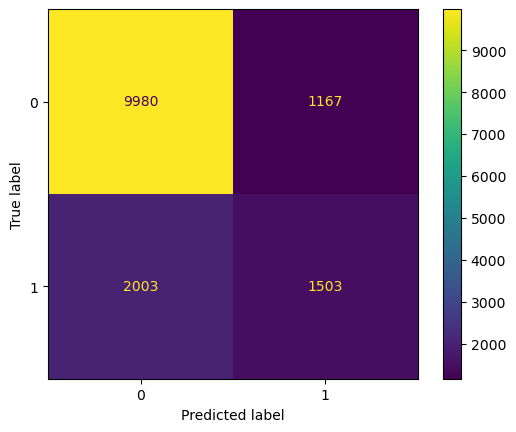

In [617]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test_rf)).plot()
plt.show()

In [618]:
y_probs_test_rf = rf_model.predict_proba(X_scaled_test)[:,1]

y_probs_test_rf

array([0.56045677, 0.65127237, 0.16202931, ..., 0.45469219, 0.00295778,
       0.03267607], shape=(14653,))

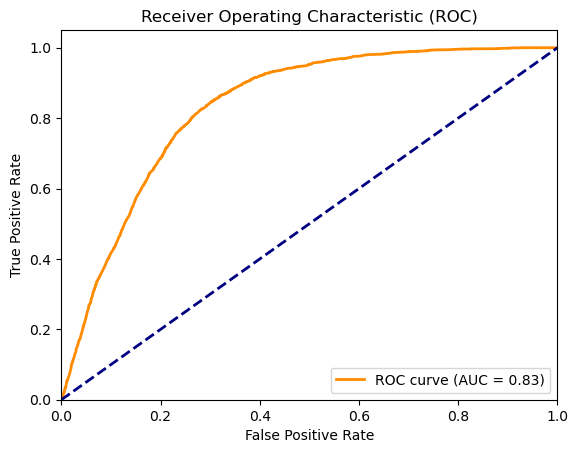

In [620]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_test_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

We once again get the same AUC value!

8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

In [636]:
def adaBoostSweepCrossValidation(X, y, folds):
    param_grid = {
        'n_estimators': range(50, 501),  # Number of weak learners (trees)
        'learning_rate': [0.001, 0.01, 0.1, 1, 10]  # Learning rate
    }

    ada_model = AdaBoostClassifier()  # Uses default base estimator (stumps)

    randomized_search = RandomizedSearchCV(estimator=ada_model, param_distributions=param_grid, n_iter=20, cv=folds, scoring='f1', n_jobs=-1)

    randomized_search.fit(X, y)

    results = pd.DataFrame(randomized_search.cv_results_)
    results = results[['param_n_estimators', 'param_learning_rate', 'mean_test_score']]
    results.columns = ['N Estimators', 'Learning Rate', 'CV F1']

    best_params = randomized_search.best_params_
    best_f1 = randomized_search.best_score_

    return results, best_params, best_f1


In [637]:
results, best_params, best_f1 = adaBoostSweepCrossValidation(X_scaled_train, y_train, folds=10)

In [632]:
results, best_params, best_f1

(    N Estimators  Learning Rate     CV F1
 0            327         10.000  0.000000
 1            236          0.100  0.000000
 2            287          0.100  0.000000
 3            269          0.100  0.000000
 4             67          1.000  0.438173
 5            429         10.000  0.000000
 6            234          0.010  0.000000
 7            461          0.010  0.000000
 8            492         10.000  0.000000
 9            319          0.100  0.000000
 10           145          0.100  0.000000
 11           249          1.000  0.481140
 12           318          0.010  0.000000
 13           332          0.010  0.000000
 14           451          0.010  0.000000
 15           248          1.000  0.481036
 16           191         10.000  0.000000
 17           142         10.000  0.000000
 18           207          0.100  0.000000
 19           300          0.001  0.000000,
 {'n_estimators': 249, 'learning_rate': 1},
 np.float64(0.4811396864642698))

In [638]:
ada_model = AdaBoostClassifier()  # Uses default base estimator (stumps)

In [639]:
ada_model = ada_model.fit(X_scaled_train, y_train)

In [ ]:
y_pred_train_ada = ada_model.predict(X_scaled_train)
y_pred_test_ada = ada_model.predict(X_scaled_test)

Compared to RandomForest model, the AdaBoost's performance in train/test is almost identical. The model doesn't perform well, and until now it seems that KNN is performing the best (although not significantly better). The worst performance was seen in the Logistic Regression

In [641]:
EvaluationScoreDF = pd.DataFrame([{
                                  "Accuracy": accuracy_score(y_train, y_pred_train_ada),
                                  "Precision": precision_score(y_train, y_pred_train_ada),
                                  "Recall": recall_score(y_train, y_pred_train_ada),
                                  "F1": f1_score(y_train, y_pred_train_ada)}])
EvaluationScoreDF                            

,Accuracy,Precision,Recall,F1
0,0.786159,0.578662,0.39115,0.466778


In [642]:
EvaluationScoreDF = pd.DataFrame([{
                                  "Accuracy": accuracy_score(y_test, y_pred_test_ada),
                                  "Precision": precision_score(y_test, y_pred_test_ada),
                                  "Recall": recall_score(y_test, y_pred_test_ada),
                                  "F1": f1_score(y_test, y_pred_test_ada)}])
EvaluationScoreDF                            

,Accuracy,Precision,Recall,F1
0,0.785846,0.576731,0.394467,0.468496


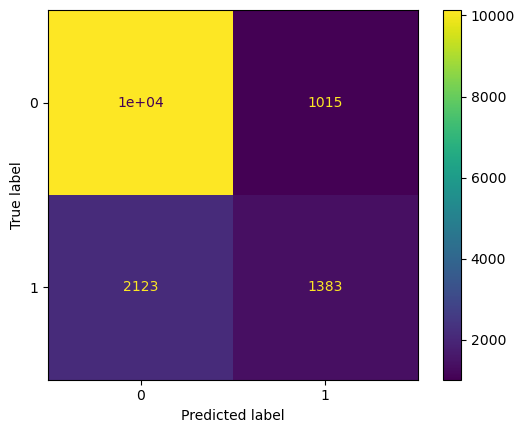

In [643]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test_ada)).plot()
plt.show()

In [644]:
y_probs_test_ada = ada_model.predict_proba(X_scaled_test)[:,1]

y_probs_test_ada

array([0.53348516, 0.47502883, 0.41785025, ..., 0.46556074, 0.28915665,
       0.36280664], shape=(14653,))

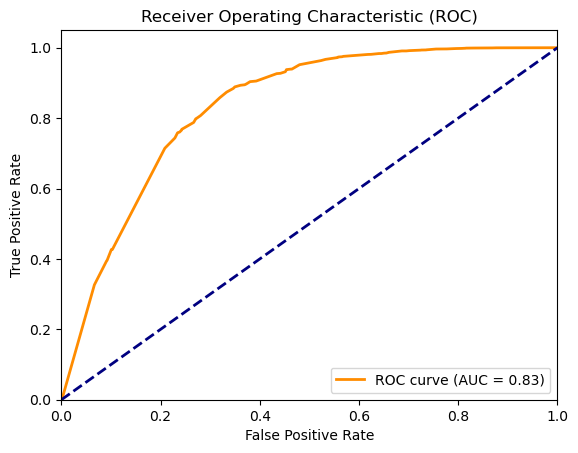

In [645]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_test_ada)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Once again we get the same AUC score. 

We can conclude that none of the models perform well, in regards of predicting the two classes evenly. Although they all obtain a somewhat high accuracy score, due to the imbalance, it is still not good enough,